In [2]:
# Import relevant packages
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
import pandas as pd

## Lesson 1: Introduction to modeling gene expression with differential equations

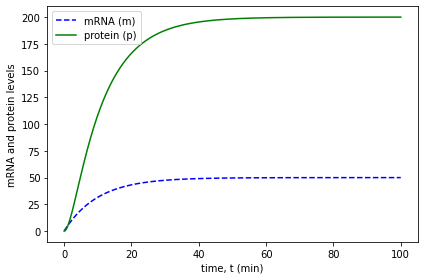

In [8]:
def constitutive_function(x,t):
    '''
    This is a function defining the relationship between mRNA x[0] and protein x[1]
    Inputs are vectors of time and x
    x is a matrix (2,1) of mRNA x[0] and protein x[1], x=[mRNA; Protein]
    '''
    
    dx = np.zeros(2) # vector that initializes dX with two place-holder zeros
    
    # Define parameter values
    # note: assign meaningful names to the variables that avoid standard functions like "mean"
    alpha_m = 5   # mRNA generation rate, units [=] 1/min
    beta_m = 0.1  # mRNA degradation rate, units [=] 1/min
    alpha_p = 2   # protein generation rate, units [=] 1/min*mol
    beta_p = 0.5  # protein degradation rate, units [=] 1/min*mol
    
    # Define the differential equations
    dx[0] = alpha_m - beta_m*x[0]        # mRNA rate of change
    dx[1] = alpha_p*x[0] - beta_p*x[1]   # protein rate of change
    
    return dx


# We will use odeint (like ode45 in MATLAB) to solve constitutive function over the range of
#  time [0,100] for the initial conditions where mRNA = 0.1 and protein = 0 so the intial condition is [0.1,0]. 
# What are the units of time? We have chosen the unit to be minutes. 
# Depending on the constants you use, you could choose another unit.
# Remember to make sure your dimensions match!

t_eval = np.linspace(0,100,100000) # evaluate 100,000 timepoints in the interval [0,100]
x0 = [0.1,0] # initial condition

sol = sp.integrate.odeint(constitutive_function, x0, t_eval)
m = sol[:,0] # solved values of mRNA x[0] over the 100,000 timepoints
p = sol[:,1] # solved values of protein x[1] over the 100,000 timepoints

# Plot the results
fig, ax = plt.subplots(1,1)
ax.plot(t_eval, m, ls='--', c='b')
ax.plot(t_eval, p, c='g')

ax.set_xlabel('time, t (min)')
ax.set_ylabel('mRNA and protein levels')
plt.legend(['mRNA (m)','protein (p)'])
fig.tight_layout()
plt.show()

## Lesson 2: Examining parameters

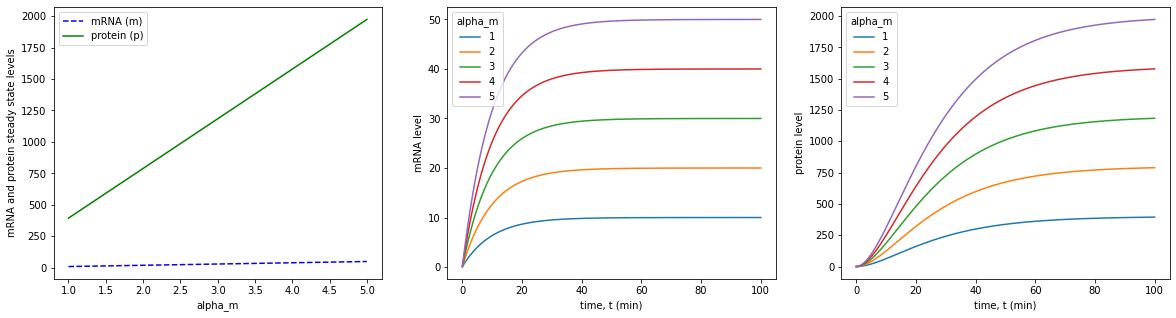

In [13]:
def constitutive_function_param(x, t, alpha_m, beta_m, alpha_p, beta_p):
    '''
    This is a function defining the relationship between mRNA x[0] and protein x[1]
    Inputs are vectors of time and x
    x is a matrix (2,1) of mRNA x[0] and protein x[1], x=[mRNA; Protein]
    '''
       
    dx = np.zeros(2) # vector that initializes dX with two place-holder zeros
    
    # Define the differential equations
    dx[0] = alpha_m - beta_m*x[0]        # mRNA rate of change
    dx[1] = alpha_p*x[0] - beta_p*x[1]   # protein rate of change
    
    return dx


# We will use odeint (like ode45 in MATLAB) to solve constitutive function over the range of
#  time [0,100] for the initial conditions where mRNA = 0.1 and protein = 0 so the intial condition is [0.1,0]. 
# Now that we've solved the result for a single set of parameters, we are interested in examining how 
#  the steady state is impacted by parameters. 

t_eval = np.linspace(0,100,100000) # evaluate 100,000 timepoints in the interval [0,100]
x0 = [0.1,0] # initial condition

alpha_m_values = np.arange(1,6) # list of different values of alpha_m to use
SS_m = np.zeros(len(alpha_m_values)) # empty matrix to store mRNA steady state values
SS_p = np.zeros(len(alpha_m_values)) # empty matrix to store protein steady state values
sz = (len(t_eval),len(alpha_m_values)) # size of matrix to store mRNA/protein values over time
m = np.zeros(sz)    # empty matrix to store mRNA values over time
p = np.zeros(sz)    # empty matrix to store protein values over time

# Define other parameters
beta_m = 0.1  # mRNA degradation rate, units [=] 1/min
alpha_p = 2   # protein generation rate, units [=] 1/min*mol
beta_p = 0.05    # protein degradation rate, units [=] 1/min*mol

# Solve system for each value of alpha_m in list
for i in range(len(alpha_m_values)):
    
    alpha_m = alpha_m_values[i]
    sol = sp.integrate.odeint(constitutive_function_param, x0, t_eval, 
                              args=(alpha_m, beta_m, alpha_p, beta_p))
    SS_m[i] = sol[-1,0]
    SS_p[i] = sol[-1,1]
    m[:,i] = sol[:,0]
    p[:,i] = sol[:,1]
    
# Plot results
fig,ax = plt.subplots(1,3,figsize=(20,5))

# Plot steady state mRNA and protein values vs alpha_m
ax[0].plot(alpha_m_values, SS_m, c='b', ls='--')
ax[0].plot(alpha_m_values, SS_p, c='g')
ax[0].set_xlabel('alpha_m')
ax[0].set_ylabel('mRNA and protein steady state levels')
ax[0].legend(['mRNA (m)','protein (p)'])

# Plot mRNA vs time for varying alpha_m
ax[1].plot(t_eval,m)
ax[1].set_xlabel('time, t (min)')
ax[1].set_ylabel('mRNA level')
ax[1].legend(alpha_m_values, title='alpha_m')

# Plot protein vs time for varying alpha_m
ax[2].plot(t_eval,p)
ax[2].set_xlabel('time, t (min)')
ax[2].set_ylabel('protein level')
ax[2].legend(alpha_m_values, title='alpha_m')

## Lesson 3: Michaelis-Menten kinetics

Feel free to write your own code below. You can use code from Lessons 1 and 2 as a template for how to solve ODEs, plot, and vary parameters.

In [ ]:
# optional code here

## Lesson 4: Repressors

Feel free to write your own code below. You can use code from Lessons 1 and 2 as a template for how to solve ODEs, plot, and vary parameters.

In [20]:
# optional code here

## Lesson 5: Hill functions

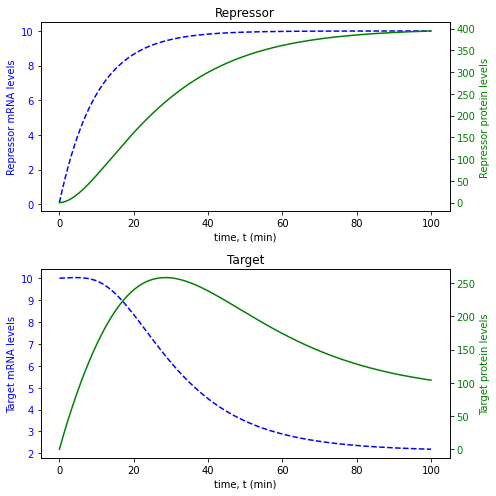

In [6]:
def repressor_function(x,t):
    '''
    This function models the mRNA and protein levels of two genes, 
     where one protein represses the expression of the other.
    Inputs are vectors of time and x
    x is a matrix (4,1) of repressor mRNA x[0] and protein x[1] and 
     target mRNA x[2] and protein x[3]
    '''
       
    dx = np.zeros(4) # vector that initializes dX with place-holder zeros
    
    # Define parameter values
    alpha_m = 1
    beta_m = 0.1
    alpha_p = 2
    beta_p = 0.05
    alpha_m0 = 0.01
    n = 2
    K = 200
    
    # Define the differential equations
    dx[0] = alpha_m - beta_m*x[0]
    dx[1] = alpha_p*x[0] - beta_p*x[1]
    dx[2] = alpha_m0 + alpha_m*(1/(1 + (x[1]/K)**n)) - beta_m*x[2]
    dx[3] = alpha_p*x[2] - beta_p*x[3]
    
    return dx


# Solve the system
t_eval = np.linspace(0,100,100000) # evaluate 100,000 timepoints in the interval [0,100]
x0 = [0.1,0,10,0] # initial condition

sol = sp.integrate.odeint(repressor_function, x0, t_eval)
m_rep = sol[:,0] # solved values of repressor mRNA x[0]
p_rep = sol[:,1] # solved values of repressor protein x[1]
m_target = sol[:,2] # solved values of target mRNA x[2]
p_target = sol[:,3] # solved values of target protein x[3]

# Plot the results
fig, ax = plt.subplots(2,1,figsize=(7,7))
ax[0].plot(t_eval, m_rep, ls='--', c='b')
ax01 = ax[0].twinx() # second y-axis on subplot 0 that shares the same x-axis
ax01.plot(t_eval, p_rep, c='g')
ax[1].plot(t_eval, m_target, ls='--', c='b')
ax11 = ax[1].twinx() # second y-axis on subplot 1 that shares the same x-axis
ax11.plot(t_eval, p_target, c='g')

ax[0].set_xlabel('time, t (min)')
ax[1].set_xlabel('time, t (min)')
ax[0].set_ylabel('Repressor mRNA levels', c='b')
ax01.set_ylabel('Repressor protein levels', c='g')
ax[1].set_ylabel('Target mRNA levels', c='b')
ax11.set_ylabel('Target protein levels', c='g')
ax[0].tick_params(axis='y', labelcolor='b')
ax01.tick_params(axis='y', labelcolor='g')
ax[1].tick_params(axis='y', labelcolor='b')
ax11.tick_params(axis='y', labelcolor='g')
ax[0].set_title('Repressor')
ax[1].set_title('Target')
fig.tight_layout()
plt.show()

## Lesson 5: Repressilator

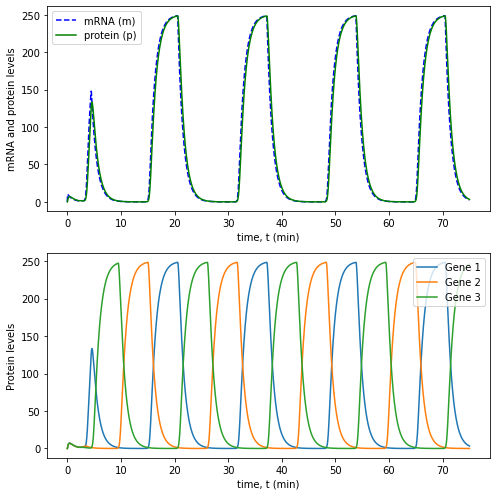

In [19]:
def repressilator_function(x,t):
    '''
    This function models the mRNA and protein levels of the repressilator
     genetic circuit, where three genes cross-repress each other in a cycle.
    Inputs are vectors of time and x
    x is a matrix (6,1) of mRNA and protein levels for the three genes
    '''
    
    dx = np.zeros(6)
    
    # Define parameter values
    alpha = 250  # sensitive parameter
    beta = 5
    alpha0 = 0.0 # what happens if the basal expression is non-zero?
    n = 10       # what happens if there is no cooperativity? n=1

    # Define the differential equations
    dx[0] = alpha/(1+x[5]**n)+ alpha0 - x[0]
    dx[1] = -beta*(x[1] - x[0])
    dx[2] = alpha/(1+x[1]**n)+ alpha0 - x[2]
    dx[3] = -beta*(x[3] - x[2])
    dx[4] = alpha/(1+x[3]**n)+ alpha0 - x[4]
    dx[5] = -beta*(x[5] - x[4])
    
    return dx

# Solve the system
t_eval = np.linspace(0,75,100000) # evaluate 100,000 timepoints in the interval [0,100]
x0 = [0.1,0,0,0,0,0] # initial condition
sol = sp.integrate.odeint(repressilator_function, x0, t_eval)

# Plot the results
fig, ax = plt.subplots(2,1,figsize=(7,7))
ax[0].plot(t_eval,sol[:,0], c='b', ls='--')
ax[0].plot(t_eval,sol[:,1], c='g')
ax[1].plot(t_eval,sol[:,1], t_eval,sol[:,3], t_eval,sol[:,5])

ax[0].set_xlabel('time, t (min)')
ax[1].set_xlabel('time, t (min)')
ax[0].set_ylabel('mRNA and protein levels')
ax[1].set_ylabel('Protein levels')
ax[0].legend(['mRNA (m)','protein (p)'])
ax[1].legend(['Gene 1','Gene 2','Gene 3'],loc='upper right')

fig.tight_layout()
plt.show()